In [1]:
a=0
a

0

In [2]:
# Modules and data loading
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
sys.path.append('..')
from pickle_fns import *
import math
from scipy.interpolate import griddata,interp2d
from scipy import spatial
from numpy import ones,vstack
from numpy.linalg import lstsq
vesdf,data_dfs=load_pkl('tikamgarh.pkl')
E,N=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)

# plt.hist([len(v['Depth']) for v in volumelogs])
# lengths=[len(v['Lithology']) == len(v['Depth']) for v in volumelogs]
def clip_longer_logs(volumelogs):
    lengths=[len(v['Lithology'])  for v in volumelogs]
    ml=min(lengths)
    i=0
    for v in volumelogs:
        i +=1
        v['Depth']=v['Depth'][:ml]
        v['Lithology']=v['Lithology'][:ml]
    return volumelogs

# np.array(xi),sum(lengths)
def getasection(volumelogs,coords,x=78.8):
#     x=78.8
    coords=np.array(coords)
    closeid=np.argmin(abs(coords[:,0]-x),axis=0)
    sec_x=coords[closeid,0]
    # coords[:,0]-x
    x_index=np.where(coords[:,0]==sec_x)[0]
    sec_logs=[]
    for i in x_index:
    #     print(i)
        sec_logs.append(np.array(volumelogs[i]['Lithology'] ))
    return coords[x_index,0],coords[x_index,1],volumelogs[x_index[0]]['Depth'],np.array(sec_logs)
def gety(x,points):
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    m, c = lstsq(A, y_coords)[0]
#     print("Line Solution is y = {m}x + {c}".format(m=m,c=c))
    return m*x+c
def get_indx_of_croockedline(coords,crooked_line):
    myKDTree = spatial.KDTree(coords)
    final_x=[]
    final_y=[]
    for i in range(1,len(crooked_line)):
        point_pair=np.array([crooked_line[i],crooked_line[i-1]])
    #     print(point_pair[:,0])

    #     
        sel_xi=xi[xi>=min(point_pair[:,0]) ]
        sel_xi=sel_xi[sel_xi<=max(point_pair[:,0])]
    #     break
        final_x.extend(sel_xi)
        final_y.extend(gety(sel_xi,point_pair))


    #get close_y index
    IND=[]
    for pt in zip(final_x,final_y):
        distance,index=myKDTree.query(pt)
        IND.append(index)
    return IND
def get_crooked_section(volumelogs,coords,xys):
#     x=78.8
    coords=np.array(coords)
    closeid=np.argmin(abs(coords[:,0]-x),axis=0)
    sec_x=coords[closeid,0]
    # coords[:,0]-x
    x_index=np.where(coords[:,0]==sec_x)[0]
    sec_logs=[]
    for i in x_index:
    #     print(i)
        sec_logs.append(np.array(volumelogs[i]['Lithology'] ))
    return coords[x_index,0],coords[x_index,1],volumelogs[x_index[0]]['Depth'],np.array(sec_logs)
def get_crooked_section(volumelogs,coords,xys):
#     x=78.8
    coords=np.array(coords)
    closeid=np.argmin(abs(coords[:,0]-x),axis=0)
    sec_x=coords[closeid,0]
    # coords[:,0]-x
    x_index=np.where(coords[:,0]==sec_x)[0]
    sec_logs=[]
    for i in x_index:
    #     print(i)
        sec_logs.append(np.array(volumelogs[i]['Lithology'] ))
    return coords[x_index,0],coords[x_index,1],volumelogs[x_index[0]]['Depth'],np.array(sec_logs)
def design_crooked_section(loc_array,vesdf):
    loc_coords=[]
    for loc in loc_array:
        loc_coords.append(vesdf[vesdf['VES No.']==str(loc)][['Easting','Northing']].values.astype(float))
    
    return loc_coords
def get_loc_lines(crooked_line,sec_logs):
    miny=min(crooked_line[:,1])
    maxy=max(crooked_line[:,1])
    perunit=len(sec_logs)/(maxy-miny)
    loc1x=[]
    loc1y=[]
    crooked_line
    for i in range(len(crooked_line)):
        lxval=(crooked_line[i,1]-miny)*perunit
        loc1x.append([lxval]*10)
        loc1y.append(list(range(0,400,40)))
    len(loc1x),len(loc1y),loc1x
    return loc1x,loc1y
def get_bound_index(v1darray):
    return np.where(v1darray[:-1] != v1darray[1:])[0]
def loggify(thicks_of_loc,labels,interval):
    rock_log=[]
    depth_log=[0]
    for layer,label in zip(thicks_of_loc,labels):
        for dt in np.arange(0,layer,interval):
            rock_log.append(label)
            depth_log.append(depth_log[-1]+interval)
    return {'Depth':depth_log[:-1],'Lithology':np.array(rock_log)}

In [3]:
myKDTree = spatial.KDTree(coords)
distance,index=myKDTree.query(pt)
# nl,r,c=layers.shape
# coords=[]
# volumelogs=[]
# for i in range(r):
#     print(i,end=',')
#     for j in range(c):
#         lyrs=layers[:,i,j]
#         volumelogs.append(loggify(lyrs,unique_lbls,interval=0.25))
#         coords.append([xi[i],yi[j]])
# volumelogs=clip_longer_logs(volumelogs)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

NameError: name 'loc1x' is not defined

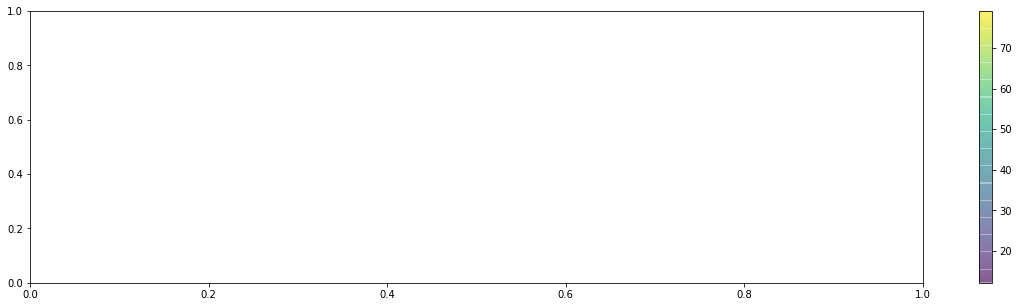

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors
from matplotlib.collections import PatchCollection
from matplotlib.patches import  Polygon
xl,yl,zl,sec_logs=getasection(volumelogs,coords,x=78.8)


color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
           'frac_granite':'#FF99CC','hard_granite':'#B00600','agranite':'#AF99Cd','final_granite':'#B006A0'}
facies_colors=[color_def[l] for l in color_def]
# i=5

# cross_section_plot(sec_logs,yl)


polygons= make_polygons(sec_logs,unique_lbls,xl,yl)
plot2dSectionFromPolys(polygons,yl)

In [214]:
ulablesfile='tikamgarh_thck_labels.npy'
layers_outfile='tikamgarh_layers.npz'

npzfile=np.load(layers_outfile)
unique_lbls,lith_dict,xi,yi,layers=npzfile['arr_0'],npzfile['arr_1'],npzfile['arr_2'],npzfile['arr_3'],npzfile['arr_4']

color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
           'frac_granite':'#FF99CC','hard_granite':'#B00600','agranite':'#AF99Cd','final_granite':'#B006A0'}
facies_colors=[color_def[l] for l in color_def]

allLoc_numbers=vesdf['VES No.'].values.astype(np.int)
sections=[
    [658,664,657,660,659],[659,660,657,661,667],[663,664,658,668],
    [672,674,673],[667,661,660,659],[671,665,670]
]
sec_image_names=['SW-NE-Twoards North','SW-E-North crecent','N_S western flank','Southern three','S to N Near North','Estern Three']

In [386]:
polysets=[]
i=0
final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
for section,sec_name in zip(sections,sec_image_names):
#     if i==1:
        print(i)
        crooked_line=design_crooked_section(section,vesdf)
        crooked_line=np.array(crooked_line).ravel().reshape(len(section),2)

    #     basemap_plot(vesdf,crooked_line,sec_name)
        polygons=[]
        for ic in range(1,len(crooked_line)):
            crookpart=np.append([crooked_line[ic-1]],[crooked_line[ic]],axis=0)
            xycoords=[]
            sec_logs=[]
            IND=get_indx_of_croockedline(coords,crookpart)
            for I in IND:
                xycoords.append(coords[I])
            sectionpart,depth_on_cl=get_polysFromLayers(layers,np.array(xycoords),xi,yi)
            polygons.append(sectionpart)
        polysets.append(polygons)
    #             sec_logs.append(np.array(volumelogs[I]['Lithology'] ))
    #         zl= volumelogs[IND[0]]['Depth']
    #         # xycoords,zl,sec_logs
    #         sec_logs=np.array(sec_logs)
    #         loc1x,loc1y=get_loc_lines(crooked_line,sec_logs)
    #         yl=np.array(xycoords)[:,1]
    #         xl=np.array(xycoords)[:,0]
    #     #     polygons= make_polygons(sec_logs,unique_lbls,xl,yl)
    #         polygons= make_polygons2(sec_logs.copy().T,final_lbls,xl,yl,zl)
    #     #     plot2dSectionFromPolys(polygons,yl)
        
        i +=1
# plot2dSectionFromPolys(polygons)
# plt.plot(depth_on_cl.T)
# plt.show
# plt.gca().invert_yaxis()
#     if i==2:

#         break
#     cross_section_plot(sec_logs,np.array(xycoords)[:,1],section,sec_name)
np.save('polysets.npy',polysets)

0
1
2
3
4
5


In [330]:
location-0.02
crooked_line,loc_trainagle

(array([[ 78.7584 ,  25.325  ],
        [ 78.80554,  25.38742],
        [ 78.87732,  25.40406],
        [ 78.91078,  25.4964 ],
        [ 78.9429 ,  25.53865]]), array([[ 78.7484,  25.315 ],
        [ 78.7684,  25.315 ],
        [ 78.7684,  25.325 ],
        [ 78.7484,  25.315 ]]))

In [363]:
def get_wellpolysFromLayers(well_one_side,layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[np.zeros(len(well_one_side))]
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        indx,indy=np.where(xi==xycoords[0])[0],np.where(yi==xycoords[1])[0]
        for xyind in well_one_side[:,:]:
            thk_on_cl.append(layers[i][indx,indy][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)
    depth_on_cl[0]=depth_on_cl[0]-10
    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(well_one_side.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(well_one_side.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))
    return polygons,depth_on_cl


#well polygons
wellsets=[]
i=0
final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
myKDTree = spatial.KDTree(coords)

allLoc_numbers

crooked_line=design_crooked_section(allLoc_numbers,vesdf)
crooked_line=np.array(crooked_line).ravel().reshape(len(allLoc_numbers),2)
for location in crooked_line:
    loc_trainagle=crook_triangle(location,dist=0.01)

    distance,index=myKDTree.query(location)
    for ic in range(1,len(loc_trainagle)):
        well_one_side=np.append([loc_trainagle[ic-1]],[loc_trainagle[ic]],axis=0)
        wellpoly,depth_on_cl=get_wellpolysFromLayers(well_one_side,layers,np.array(coords[index]),xi,yi)
        wellsets.append(wellpoly)
        print(wellpoly)
        
        
                
    #     #     basemap_plot(vesdf,crooked_line,sec_name)
    #         for location in crooked_line:
    # #             crookpart=np.append([crooked_line[ic-1]],[crooked_line[ic]],axis=0)
    #             points=points_in_circle_np(0.02, x0=location[0], y0=location[1] )

    #             xycoords=[]
    #             sec_logs=[]
    #             IND=get_indx_of_croockedline(coords,points)
    #             for I in IND:
    #                 xycoords.append(coords[I])
    #             wellpoly,depth_on_cl=get_polysFromLayers(layers,np.array(xycoords),xi,yi)
    #             wellsets.append(wellpoly)
    #     #             sec_logs.append(np.array(volumelogs[I]['Lithology'] ))
    #     #         zl= volumelogs[IND[0]]['Depth']
    #     #         # xycoords,zl,sec_logs
    #     #         sec_logs=np.array(sec_logs)
    #     #         loc1x,loc1y=get_loc_lines(crooked_line,sec_logs)
    #     #         yl=np.array(xycoords)[:,1]
    #     #         xl=np.array(xycoords)[:,0]
    #     #     #     polygons= make_polygons(sec_logs,unique_lbls,xl,yl)
    #     #         polygons= make_polygons2(sec_logs.copy().T,final_lbls,xl,yl,zl)
    #     #     #     plot2dSectionFromPolys(polygons,yl)
        
        i +=1
np.save('wellsets.npy',wellsets)
# crooked_line
# closxid,closyid
# distance,index

[array([[ 78.86732,  25.39406, -10.     ],
       [ 78.88732,  25.39406, -10.     ],
       [ 78.88732,  25.39406,   0.61273],
       [ 78.86732,  25.39406,   0.61273]]), array([[ 78.86732,  25.39406,   0.61273],
       [ 78.88732,  25.39406,   0.61273],
       [ 78.88732,  25.39406,   1.61123],
       [ 78.86732,  25.39406,   1.61123]]), array([[ 78.86732,  25.39406,   1.61123],
       [ 78.88732,  25.39406,   1.61123],
       [ 78.88732,  25.39406,   1.61123],
       [ 78.86732,  25.39406,   1.61123]]), array([[ 78.86732,  25.39406,   1.61123],
       [ 78.88732,  25.39406,   1.61123],
       [ 78.88732,  25.39406,   1.61123],
       [ 78.86732,  25.39406,   1.61123]]), array([[ 78.86732,  25.39406,   1.61123],
       [ 78.88732,  25.39406,   1.61123],
       [ 78.88732,  25.39406,  21.03023],
       [ 78.86732,  25.39406,  21.03023]]), array([[ 78.86732,  25.39406,  21.03023],
       [ 78.88732,  25.39406,  21.03023],
       [ 78.88732,  25.39406,  27.07713],
       [ 78.86732,  25.

[array([[ 78.89226,  25.13023, -10.     ],
       [ 78.87226,  25.12023, -10.     ],
       [ 78.87226,  25.12023,   0.     ],
       [ 78.89226,  25.13023,   0.     ]]), array([[ 78.89226   ,  25.13023   ,   0.        ],
       [ 78.87226   ,  25.12023   ,   0.        ],
       [ 78.87226   ,  25.12023   ,   1.80496267],
       [ 78.89226   ,  25.13023   ,   1.80496267]]), array([[ 78.89226   ,  25.13023   ,   1.80496267],
       [ 78.87226   ,  25.12023   ,   1.80496267],
       [ 78.87226   ,  25.12023   ,   4.26687646],
       [ 78.89226   ,  25.13023   ,   4.26687646]]), array([[ 78.89226   ,  25.13023   ,   4.26687646],
       [ 78.87226   ,  25.12023   ,   4.26687646],
       [ 78.87226   ,  25.12023   ,  45.56018165],
       [ 78.89226   ,  25.13023   ,  45.56018165]]), array([[ 78.89226   ,  25.13023   ,  45.56018165],
       [ 78.87226   ,  25.12023   ,  45.56018165],
       [ 78.87226   ,  25.12023   ,  56.57537479],
       [ 78.89226   ,  25.13023   ,  56.57537479]]), array

In [366]:
# loc_trainagle,crookpart,xycoords
# IND=get_indx_of_croockedline(coords,crookpart)
# IND,crookpart
crooked_line
allLoc_numbers

d4plots=vesdf['VES No.'].values
E,N= vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
np.save('loc_info.npy',(E,N,allLoc_numbers))

In [367]:
allLoc_numbers

array([657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669,
       670, 671, 672, 673, 674])

In [331]:
crooked_line, wellpoly

def points_in_circle_np(radius, x0=79.14606, y0=24.97873, ):
    points=[]
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, 0.01,dtype=float)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, 0.01, dtype=float)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    for x, y in zip(x_[x], y_[y]):
        points.append([x, y])
    return points

def crook_triangle(loc,dist=0.01):
    return [[loc[0]-dist,loc[1]-dist],
     [loc[0]+dist,loc[1]-dist],
     [loc[0]+dist,loc[1]],
     [loc[0]-dist,loc[1]-dist],
    ]
# points=points_in_circle_np(0.02, x0=79.14606, y0=24.97873, )
# points
# radius=0.01
# x0=79.14606
# y0=24.97873
# x_ = np.arange(x0 - radius - 1, x0 + radius + 1, 0.01,dtype=float)
# y_ = np.arange(y0 - radius - 1, y0 + radius + 1, 0.01, dtype=float)
# x_,y_
location

array([ 78.7584,  25.325 ])

In [320]:
# np.save('polysets.npy',polysets)
np.save('wellsets.npy',wellsets)
# plt.plot(depth_on_cl.T)

# for p in polygons:
#     plt.plot(range(len(p[:,0])),p[:,2],'*')
# plt.gca().invert_yaxis()
# plt.show
crooked_line
for ic in range(1,len(crooked_line)):
    print(np.append([crooked_line[ic-1]],[crooked_line[ic]],axis=0))

[[ 79.14606  24.97873]
 [ 79.23849  25.01731]]
[[ 79.23849  25.01731]
 [ 79.27668  25.08951]]


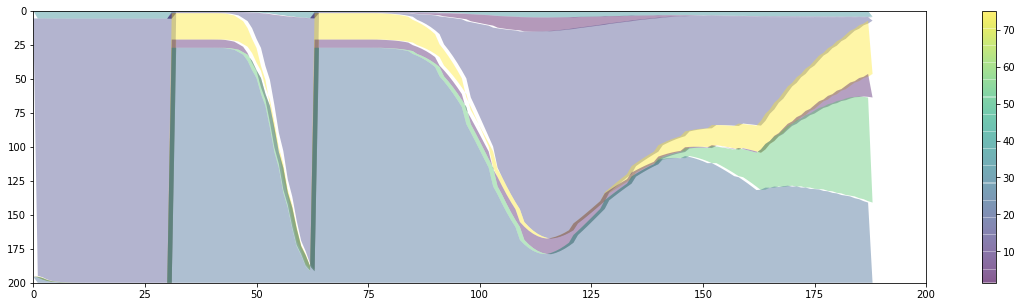

In [254]:
patches=[]
for k in range(len(polygons)):
#     print(k)
    if len(polygons[k])>0:
#             x=np.append(polygons[k][:,0],np.flipud(polygons[k][:,0]))
#             y=np.append(polygons[k][:,1],np.flipud(polygons[k][:,1]))
#             z=np.append(polygons[k][:,2],np.flipud(polygons[k][:,3]))

        x=np.array(polygons[k][:,0])
        y=np.array(polygons[k][:,1])
        z=np.array(polygons[k][:,2])
        cust_range=list(range(int(len(z)/2)))+list(range(int(len(z)/2),0,-1))
        polygon = Polygon(np.array([cust_range,z]).T, True)
        patches.append(polygon)

# fig, ax = plt.subplots()      
f,ax=plt.subplots( figsize=(20, 5))
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
f.colorbar(p, ax=ax)
#     for lx,ly,l in zip(loc1x,loc1y,locations):
#         ax.plot(lx,ly,'k')
#         ax.annotate(l, xy=(lx[0]-3, ly[0]-1))
# ax.set_xlim(min(y),max(y))
ax.set_xlim(0,200)
ax.set_ylim(0,200)
ax.invert_yaxis()
#     ax.invert_xaxis()
plt.show()

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7


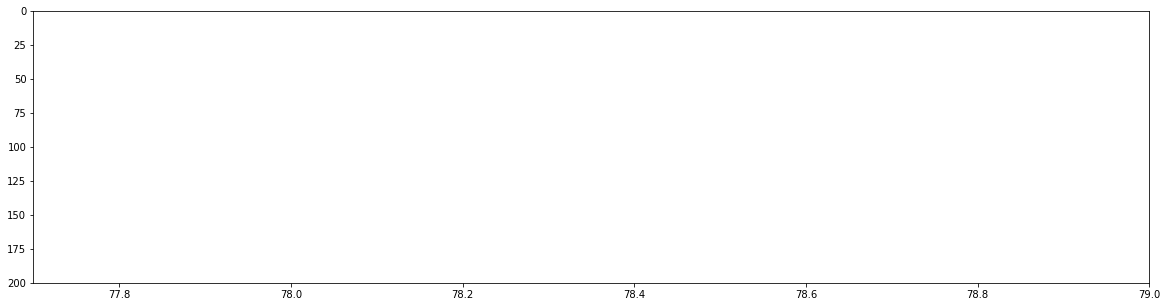

In [425]:
n=5
# patches=[]
for total_section in polysets[n:n+1]:
    patches=[]
    mycolors=[]
    f,ax=plt.subplots( figsize=(20, 5))
    for polygons in total_section:
        
        for k in range(len(polygons)):
            print(k)
            if len(polygons[k])>0:
                x=np.array(polygons[k][:,0])
                y=np.array(polygons[k][:,1])
                z=np.array(polygons[k][:,2])
#                 cust_range=list(range(int(len(z)/2)))+list(range(int(len(z)/2),0,-1))
#                 polygon = Polygon(np.array([cust_range,z]).T, True)
                polygon = Polygon(np.array([x,z]).T, closed=True,color=facies_colors[final_lbls[k]],
                          fill=True, hatch='/')
                patches.append(polygon)
                mycolors.append(facies_colors[final_lbls[k]])
                ax.add_patch(polygon)

#     # fig, ax = plt.subplots()      
#     f,ax=plt.subplots( figsize=(20, 5))
#     colors = 100*np.random.rand(len(patches))
#     p = PatchCollection(patches, alpha=0.4)
#     p.set_array(np.array(mycolors))
# #     collection.set_facecolor(facies_colors[final_lbls[k]])
#     ax.add_collection(p)
#     f.colorbar(p, ax=ax)
#         for lx,ly,l in zip(loc1x,loc1y,locations):
#             ax.plot(lx,ly,'k')
#             ax.annotate(l, xy=(lx[0]-3, ly[0]-1))
#     ax.set_xlim(min(y),max(y))
#     ax.set_xlim(25.3,25.6)
    ax.set_xlim(77.7,79)
#     ax.set_xlim(0,200)
    ax.set_ylim(0,200)
    ax.invert_yaxis()
    #     ax.invert_xaxis()
    plt.show()

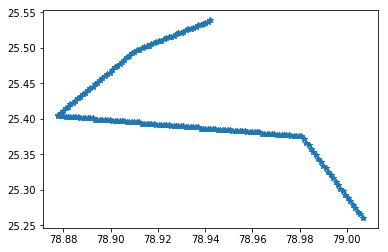

In [258]:
# list(range(int(len(z)/2)))+list(range(int(len(z)/2),0,-1))
plt.plot(x,y,'*')

In [405]:
# np.random.rand(len(x))/1000+x
# np.array(colors)
facies_colors[final_lbls[k]]

'#B00600'

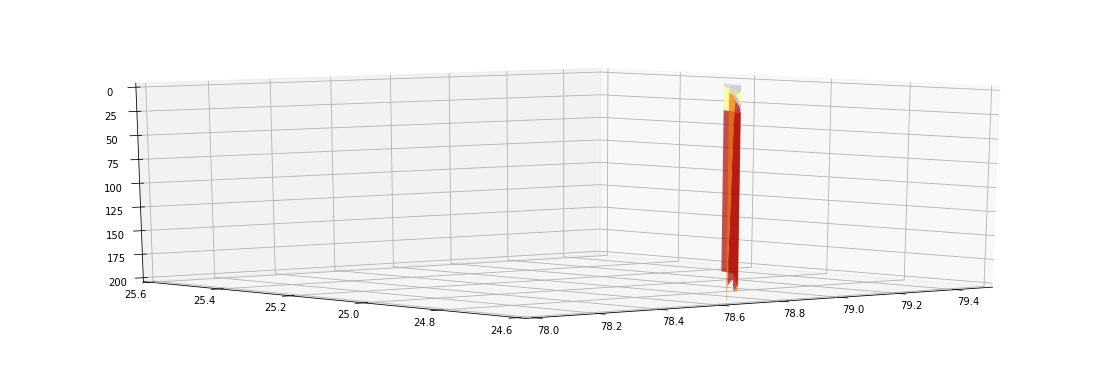

In [426]:
from   mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure(figsize=(15,5))
ax = Axes3D(fig)
final_lbls
n=5
for total_section in polysets[n:n+1]:
    for polygons in total_section:
        for k in range(len(polygons)):

        #         print(k)
            if len(polygons[k])>0:
        #             x=np.append(polygons[k][:,0],np.flipud(polygons[k][:,0]))
        #             y=np.append(polygons[k][:,1],np.flipud(polygons[k][:,1]))
        #             z=np.append(polygons[k][:,2],np.flipud(polygons[k][:,3]))
                x=np.array(polygons[k][:,0])
                y=np.array(polygons[k][:,1])
                z=np.array(polygons[k][:,2])
                z=np.random.rand(len(x))/1000+z

                verts = [list(zip(x, y, z))]
                # print(verts)
                # ax.add_collection3d(Poly3DCollection(verts), zs='z')
                # collection = Poly3DCollection(poly3d, linewidths=1, alpha=0.2)

                collection = Poly3DCollection(verts, linewidths=1, alpha=0.7)
            #     face_color = [0.5, 0.5, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
                collection.set_facecolor(facies_colors[final_lbls[k]])
                ax.add_collection3d(collection,zs='z')
    #             ax.plot(x,y,z,'*')
    #         ax

# ax.set_xlim((min(x),max(x)))
# ax.set_ylim((min(y),max(y)))
# ax.set_zlim((min(z),max(z)))
# ax.set_xlim((min(x)-0.4,max(x)+.4))
# ax.set_ylim((min(y)-.4,max(y)+.4))
ax.set_xlim((78,79.5))
ax.set_ylim((24.6,25.6))
ax.set_zlim((0,200))
# ax.plot(x,y,z,'*')
ax.invert_zaxis()
ax.view_init(elev=10., azim=230)
# ax.scatter(x, y, z)
plt.show()       

In [384]:
len(polysets)

18

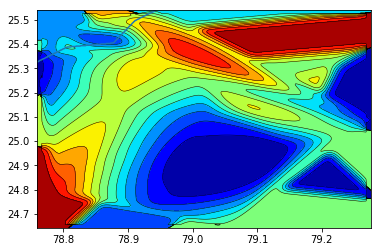

In [96]:

# # def plot_grid(xi,yi,zi):
CS = plt.contour(xi,yi,layers[0],15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,layers[0],15,cmap=plt.cm.jet)
# plt.colorbar() # draw colorbar
# # plt.show()
# # crooked_line
# IND=get_indx_of_croockedline(coords,crooked_line)
# # xycoords=np.array(xycoords)
plt.plot(xycoords[:,0],xycoords[:,1])
# plt.plot(crooked_line[:,0],crooked_line[:,1],'*r')
plt.show
# len(layers)
for I in xycoords[:,1]:
    ind=np.where(yi==I)
#     print(ind)
# dtype(xi),type(xycoords)
# xi

In [222]:
def get_polysFromLayers(layers,xycoords,xi,yi):
    polys=[]

    ztbs=[]
    depth_on_cl=[np.zeros(len(xycoords))]
    for i in range(len(layers)):
#         print(i)
        j=0
        thk_on_cl=[]
        for xyind in xycoords[:,:]:
    #         print(j,end=',')
            indx,indy=np.where(xi==xyind[0])[0],np.where(yi==xyind[1])[0]
            thk_on_cl.append(layers[i][indx,indy][0])
            j +=1
        #     print(indx,indy)
        depth_on_cl=np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)

    polygons=[]
    for i in range(1,len(depth_on_cl)):
    #     poly=[xycoords depth_on_cl
        xyz_top=np.append(xycoords.T,[depth_on_cl[i-1]],axis=0)
        xyz_bot=np.append(xycoords.T,[depth_on_cl[i]],axis=0)
        polygons.append(np.append(xyz_top.T,np.flipud(xyz_bot.T),axis=0))    
    return polygons,depth_on_cl


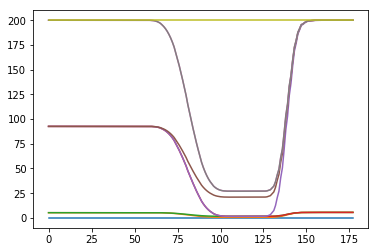

In [161]:
# depth_on_cl=[np.zeros(len(xycoords))]
# len(depth_on_cl),len(thk_on_cl),
# # len(np.append(depth_on_cl,[thk_on_cl],axis=0))
plt.plot(depth_on_cl.T)

In [197]:
depth_on_cl[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

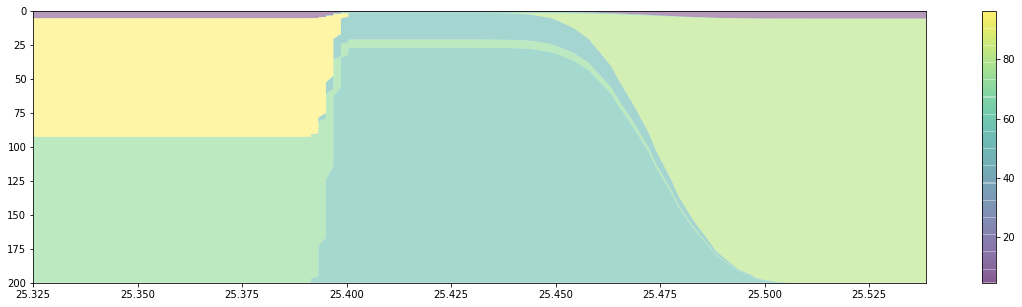

In [209]:
def plot2dSectionFromPolys(polygons):
    patches=[]
    for k in range(len(polygons)):
    #     print(k)
        if len(polygons[k])>0:
#             x=np.append(polygons[k][:,0],np.flipud(polygons[k][:,0]))
#             y=np.append(polygons[k][:,1],np.flipud(polygons[k][:,1]))
#             z=np.append(polygons[k][:,2],np.flipud(polygons[k][:,3]))
            
            x=np.array(polygons[k][:,0])
            y=np.array(polygons[k][:,1])
            z=np.array(polygons[k][:,2])
            polygon = Polygon(np.array([y,z]).T, True)
            patches.append(polygon)
    
    # fig, ax = plt.subplots()      
    f,ax=plt.subplots( figsize=(20, 5))
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.4)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    f.colorbar(p, ax=ax)
#     for lx,ly,l in zip(loc1x,loc1y,locations):
#         ax.plot(lx,ly,'k')
#         ax.annotate(l, xy=(lx[0]-3, ly[0]-1))
    ax.set_xlim(min(y),max(y))
    ax.set_ylim(0,200)
    ax.invert_yaxis()
#     ax.invert_xaxis()
    plt.show()
# np.append(depth_on_cl,[depth_on_cl[-1]+thk_on_cl],axis=0)


print()


# plot2dSectionFromPolys(polygons)
# patches=[]
# for k in range(len(polygons[0:1])):
# #     print(k)
#     if len(polygons[k])>0:
#         x=np.array(polygons[k][:,0])
#         y=np.array(polygons[k][:,1])
#         z=np.array(polygons[k][:,2])
#         polygon = Polygon(np.array([y,z]).T, True)
#         patches.append(polygon)

# # fig, ax = plt.subplots()      
# f,ax=plt.subplots( figsize=(20, 5))
# colors = 100*np.random.rand(len(patches))
# p = PatchCollection(patches, alpha=0.4)
# p.set_array(np.array(colors))
# ax.add_collection(p)
# f.colorbar(p, ax=ax)
# #     for lx,ly,l in zip(loc1x,loc1y,locations):
# #         ax.plot(lx,ly,'k')
# #         ax.annotate(l, xy=(lx[0]-3, ly[0]-1))
# ax.set_xlim(min(y),max(y))
# ax.set_ylim(0,200)
# ax.invert_yaxis()
# #     ax.invert_xaxis()
# # ax.plot(y,z,'*')
# plt.show()

In [200]:
polygons[0]

array([[ 78.7584    ,  25.32507719,   0.        ],
       [ 78.75943864,  25.32687192,   0.        ],
       [ 78.76047727,  25.32687192,   0.        ],
       ..., 
       [ 78.76047727,  25.32687192,   5.29223   ],
       [ 78.75943864,  25.32687192,   5.29223   ],
       [ 78.7584    ,  25.32507719,   5.29223   ]])

In [287]:
np.save('facies_colors.npy',facies_colors)
np.save('final_lbls.npy',final_lbls)
np.save('polysets.npy',polysets)
# depth_on_cl[0]
# np.flipud
# print(xyz[:,0:5].T)
# print(np.flipud(xyz[:,0:5].T))
# print(np.append(xyz.T,np.flipud(xyz.T),axis=0))

In [211]:
final_lbls

[0, 1, 2, 3, 4, 5, 3, 5]

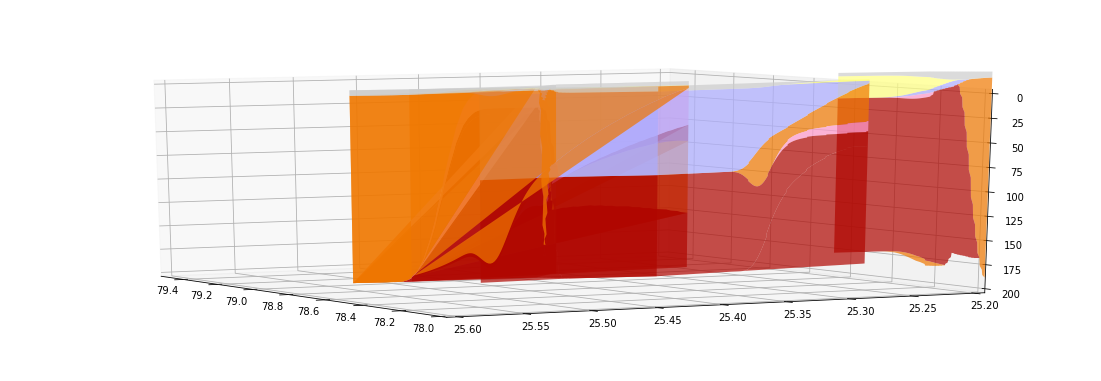

In [218]:
from   mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure(figsize=(15,5))
ax = Axes3D(fig)
final_lbls
for polygons in polysets:
    for k in range(len(polygons)):
    #         print(k)
        if len(polygons[k])>0:
    #             x=np.append(polygons[k][:,0],np.flipud(polygons[k][:,0]))
    #             y=np.append(polygons[k][:,1],np.flipud(polygons[k][:,1]))
    #             z=np.append(polygons[k][:,2],np.flipud(polygons[k][:,3]))
            x=np.array(polygons[k][:,0])
            y=np.array(polygons[k][:,1])
            z=np.array(polygons[k][:,2])

            verts = [list(zip(x, y, z))]
            # print(verts)
            # ax.add_collection3d(Poly3DCollection(verts), zs='z')
            # collection = Poly3DCollection(poly3d, linewidths=1, alpha=0.2)

            collection = Poly3DCollection(verts, linewidths=1, alpha=0.7)
        #     face_color = [0.5, 0.5, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
            collection.set_facecolor(facies_colors[final_lbls[k]])
            ax.add_collection3d(collection,zs='z')

# ax.set_xlim((min(x),max(x)))
# ax.set_ylim((min(y),max(y)))
# ax.set_zlim((min(z),max(z)))
# ax.set_xlim((min(x)-0.4,max(x)+.4))
# ax.set_ylim((min(y)-.4,max(y)+.4))
ax.set_xlim((78,79.5))
ax.set_ylim((25.2,25.6))
ax.set_zlim((0,200))
# ax.plot(x,y,z,'*')
ax.invert_zaxis()
ax.view_init(elev=10., azim=150)
# ax.scatter(x, y, z)
plt.show()       
    

In [21]:
# len(polygons),verts
polygons[k]

array([[ 78.7584    ,  25.32507719,   0.        ,   0.        ],
       [ 78.7584    ,  25.32507719,   5.25      ,   0.        ],
       [ 78.82383415,  25.39148218,   5.25      ,   0.        ],
       [ 78.82487279,  25.39148218,   5.        ,   0.        ],
       [ 78.82902733,  25.39327691,   5.        ,   0.        ],
       [ 78.83006597,  25.39327691,   4.75      ,   0.        ],
       [ 78.83214325,  25.39327691,   4.75      ,   0.        ],
       [ 78.83318188,  25.39327691,   4.5       ,   0.        ],
       [ 78.83422052,  25.39327691,   4.5       ,   0.        ],
       [ 78.8362978 ,  25.39507164,   4.        ,   0.        ],
       [ 78.83733643,  25.39507164,   4.        ,   0.        ],
       [ 78.84252962,  25.39686637,   2.75      ,   0.        ],
       [ 78.84356826,  25.39686637,   2.75      ,   0.        ],
       [ 78.84772281,  25.39686637,   1.75      ,   0.        ],
       [ 78.84876144,  25.39686637,   1.75      ,   0.        ],
       [ 78.85083872,  25

In [10]:
def secshow(s):
    s=np.uint8(50*s.T)

    # cv2.imshow('draw contours',s)
    # cv2.waitKey(0)

    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image',s)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
unique_lbls

array([ 0,  1,  2,  3,  4,  5, 30, 50], dtype=int64)

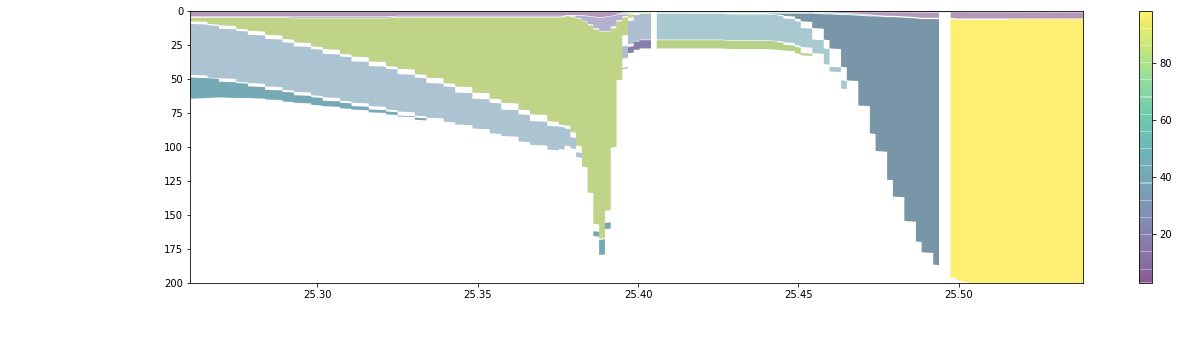

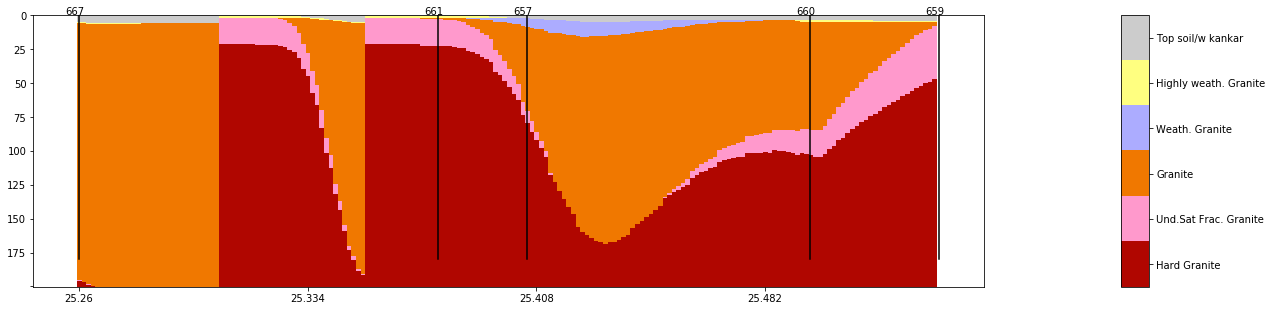

In [ ]:
# %matplotlib inline
# for polygons in polysets[2:5]:
#     plot2dSectionFromPolys(polygons,yl)
# # polygons
# fig = plt.figure(figsize=(15,5))
# ax = Axes3D(fig)
# for p in polygons:
# #     print(p[:,0])
#     plt.plot(p[:,0],p[:,2],'*')
# plt.show()
i=0
final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
for section,sec_name in zip(sections,sec_image_names):
    if i==1:
        locations=section
        crooked_line=design_crooked_section(section,vesdf)
        crooked_line=np.array(crooked_line).ravel().reshape(len(section),2)

    #     basemap_plot(vesdf,crooked_line,sec_name)
        xycoords=[]
        sec_logs=[]
        IND=get_indx_of_croockedline(coords,crooked_line)
        for I in IND:
            xycoords.append(coords[I])
            sec_logs.append(np.array(volumelogs[I]['Lithology'] ))
        zl= volumelogs[IND[0]]['Depth']
        # xycoords,zl,sec_logs
        sec_logs=np.array(sec_logs)

        loc1x,loc1y=get_loc_lines(crooked_line,sec_logs)
        yl=np.array(xycoords)[:,1]
        xl=np.array(xycoords)[:,0]
        polygons= make_polygons2(sec_logs.copy().T,final_lbls,xl,yl,zl)
        plot2dSectionFromPolys(polygons,yl)
        cross_section_plot(sec_logs,yl)
        secshow(sec_logs)
#     break
#     polysets.append(polygons)
    i +=1


In [497]:
a = [[1, 2], [3, 4]]
np.pad(a, ((3, 2), (2, 3)), 'minimum')
np.pad(a, 3,'constant', constant_values=(0, 0))

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 3, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [41]:
import cv2
def find_contours(s,ul,padding=3):
    s[s!=ul]=100
    s[s==ul]=255
    s[s==100]=1
    s=np.pad(s, padding,'constant', constant_values=(1, 1))
    s=np.uint8(s)
    # im = cv2.imread('Estern Three_vsection.png')
    # imCopy = im.copy()
    # imgray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # cv2.drawContours(imCopy,contours,-1,(0,255,0))
    # cv2.imshow('draw contours',imCopy)
    # cv2.waitKey(0)
#     imgray=s
    ret,thresh = cv2.threshold(s,127,255,0)
    
    image, contours, hierarchy =  cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     imCopy=cv2.drawContours(s,contours,-1,(0,255,0))
#     cv2.imshow('draw contours',imCopy)
#     cv2.waitKey(0)
#     print(contours)
    return contours
def cnt2poly(contours,xl,yl,zl,ul,limitpoints=4,padding=3):
    polygons=[]
    for c in contours:
        if len(c)>limitpoints:
#             print(len(c))
            bounds=[]
            for a in c:
    #             print(a[0][0],end=',')
                bounds.append([xl[a[0][0]-padding],yl[a[0][0]-padding],zl[a[0][1]-padding],ul])
    #         print("************************************************")
            polygons.append(np.array(bounds))
    return polygons
def make_polygons(sec_logs,unique_lbls,xl,yl):
    polygons=[]
    for ul in unique_lbls:
        bounds=[]
    #     print(ul)
        for j in range(len(sec_logs)):
    #         print(j,end=',')
            s=  np.append(np.append(100,sec_logs[j]),100)
    #         print(s)
            s[s!=ul]=100 
            zbs=get_bound_index(s)
            if len(zbs)>0:
    #             print(zbs,len(zbs),end=',')
                if len(zbs)>1:
                    try:
                        zs=zl[zbs[0]],zl[zbs[1]-1]
                    except:
                        zs=zl[zbs[0]],zl[zbs[1]]
                else:
                    zs=zl[zbs[0]],zl[zbs[0]]
                bounds.append([xl[j],yl[j],zs[0],zs[1],ul])
        polygons.append(np.array(bounds))
#         i +=1
    return polygons
def make_polygons2(sec_logs,unique_lbls,xl,yl,zl,padding=10):
    polygons=[]
    for ul in unique_lbls:
        s=sec_logs.copy()
        cnts=find_contours(s,ul,padding=padding)

        polygons.extend(cnt2poly(cnts,xl,yl,zl,ul,limitpoints=4,padding=padding))
    return polygons

def cross_section_plot(sec_logs,yl):
    color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
               'frac_granite':'#FF99CC','hard_granite':'#B00600'} #,'agranite':'#AF99Cd','final_granite':'#B006A0'

    lith_label_def={0:'Top soil/w kankar',1:'Highly weath. Granite',2:'Weath. Granite',3:'Granite' ,4:'Und.Sat Frac. Granite',5:'Hard Granite',}
    facies_colors=[color_def[l] for l in color_def]
    facies_labels=[lith_label_def[l] for l in lith_label_def]
    # facies_colors[0:len(final_lbls)],facies_colors[0:len(unique_lbls)],len(final_lbls),len(unique_lbls),final_lbls,unique_lbls
    f,ax=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[15,1]) 
    ax[0] = plt.subplot(gs[0])
    ax[1] = plt.subplot(gs[1])
    # cmap_facies = colors.ListedColormap( np.array(facies_colors)[final_lbls], 'indexed')
    cmap_facies = colors.ListedColormap( facies_colors[0:len(unique_lbls)], 'indexed')

    im=ax[0].imshow(sec_logs.T, interpolation='none', aspect='auto',
                            cmap=cmap_facies,vmin=0,vmax=6)
    trc_space=(max(yl)-min(yl))/len(sec_logs)
    ntraces=50
    tentrcspace=round(1000*trc_space*ntraces)/1000

    xticks=np.arange(round(min(yl)*100)/100,max(yl),tentrcspace)
    ind=np.arange(0,len(sec_logs),ntraces)
    ax[0].set_xlim(-10,len(sec_logs)+10)
    ax[0].set_xticks(ind)
    ax[0].set_xticklabels(xticks)
    for lx,ly,l in zip(loc1x,loc1y,locations):
        ax[0].plot(lx,ly,'k')
        ax[0].annotate(l, xy=(lx[0]-3, ly[0]-1))

    # ax[0].set_xticks(ind)
    ax[0].set_yticklabels(np.arange(-25,200,25))
    # ax[0].set_xlim(min(yl),max(yl))
    divider = make_axes_locatable(ax[-1])
    # ax[1].set_ticklabels('')
    ax[-1].axis('off')
    cax = divider.append_axes("right", size="100%", pad=0.1)
    cbar=plt.colorbar(im, cax=cax)
    #     cbar.set_label((11*' ').join(facies_labels[::-1]))
    cbar.set_ticks(np.arange(0.5,6,1)); 
    # cbar.ax.set_xticklabels('')
    cbar.ax.invert_yaxis() 
    cbar.ax.set_yticklabels(facies_labels)
    plt.show()
#     f.savefig(image_name+'_vsection.png')

In [481]:

# polygons= make_polygons(sec_logs,unique_lbls,xl,yl)
polygons=[]
for ul in unique_lbls:
    bounds=[]
    zss=[]
#     print(ul)
    for j in range(len(sec_logs)):
#         print(j,end=',')
        s=  np.append(np.append(100,sec_logs[j]),100)
#         print(s)
        s[s!=ul]=100 
        zbs=get_bound_index(s)
        
        if len(zbs)>0:
#             print(zbs,len(zbs))
            if len(zbs)>1:
                try:
                    zs=zl[zbs[0]],zl[zbs[1]-1]
                except:
                    zs=zl[zbs[0]],zl[zbs[1]]
            else:
                zs=zl[zbs[0]],zl[zbs[0]]
            zss.append(zs)
            bounds.append([xl[j],yl[j],zs[0],zs[1],ul])
    diffz=np.diff(zss)
    diffneighbor=np.square(diffz[1:]-diffz[:-1])
    try:
        polystarts,_=np.where(diffneighbor>(6/2)*np.mean(diffneighbor))
        polystarts=np.append(np.append(0,polystarts+1),-1)
        for i in range(1,len(polystarts)):
    #         print(zss[polystarts[i-1]:polystarts[i]])
            polygons.append(np.array(bounds[polystarts[i-1]:polystarts[i]]))
    except:
        polygons.append(np.array(bounds))
# plot2dSectionFromPolys(polygons,yl)

diffz=np.diff(zss)
diffneighbor=np.square(diffz[1:]-diffz[:-1])
polystarts,_=np.where(diffneighbor>(3/2)*np.mean(diffneighbor))
polystarts=np.append(np.append(0,polystarts+1),-1)
for i in range(1,len(polystarts)):
    print(zss[polystarts[i-1]:polystarts[i]])
    polygons.append(np.array([polystarts[i-1]:polystarts[i]]))
    


D:\adiarun\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\adiarun\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
